In [1]:
import readline
readline.clear_history()

In [2]:
#Import packages
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py
import cufflinks as cf
cf.go_offline()

# Read files

In [4]:
#read files, join - MUST HAVE FILES IN LOCAL DIRECTORY
df = pd.read_csv("/Users/rehanarajwani/Documents/Data - Amazon/Books_5_overall_1.csv")

In [5]:
print(df)

             asin   helpful  overall  \
0      000100039X  [11, 40]        1   
1         1714538    [0, 1]        1   
2         2007770    [0, 3]        1   
3         2007770    [1, 2]        1   
4         2007770    [2, 3]        1   
5         2007770    [1, 3]        1   
6         2007770    [4, 6]        1   
7         2007770   [4, 14]        1   
8         2007770   [4, 10]        1   
9         2007770   [4, 16]        1   
10     000221735X   [6, 17]        1   
11     000224053X    [5, 6]        1   
12     000224053X   [6, 14]        1   
13     000224053X    [1, 4]        1   
14     000224053X   [8, 26]        1   
15     000224053X   [4, 12]        1   
16        2247399  [42, 49]        1   
17        2247399    [4, 5]        1   
18        2247399  [12, 14]        1   
19        2247399  [39, 51]        1   
20        2247399  [13, 15]        1   
21        2247399    [7, 8]        1   
22        2247399  [10, 13]        1   
23        2247399    [1, 5]        1   


In [6]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#plt.legend(title="Legend Title")
#plt.xlabel("xLabel")

6.0
4.0


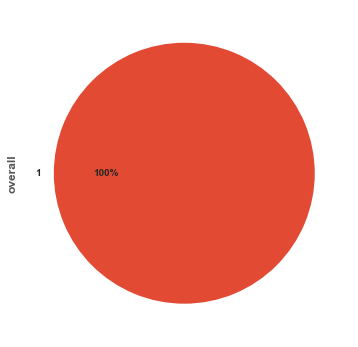

In [7]:
df.overall.value_counts().plot(kind='pie', autopct='%1.0f%%')

lets check what is the rating percentage

In [8]:
type(df.reviewText)

pandas.core.series.Series

In [9]:
df = df[~df['reviewText'].isnull()]

In [10]:
df["reviewText"]= df["reviewText"].astype(str)

In [11]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

In [12]:
df['reviewText'] = preprocess(df['reviewText'])

In [13]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

df['polarity'] = df['reviewText'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['reviewText'].astype(str).apply(len)
df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split()))

# To preview whether the sentiment polarity score works, we randomly select 5 reviews with the highest sentiment polarity score (1):

In [14]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['reviewText']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

I liked the beginning of this book but as I got into it it became looooooong and drawn out. It got to the point where I would skip a chapter and miss NOTHING!!! It just dragged on and on and on...........
Mother in law purchased this book to help my father in law and after reading it she said that she wasn't impressed.
This story is just a copy of &#34;We're Going on a Bear Hunt&#34; by Helen Oxenbury and Michael Rosen.  That is a great book!  But I don't know how she can publish this lion take on it that's almost identical.
I started reading this and was not at all impressed.  After trying to read 3 or 4 stories I just deleted the book.  Not at all what I was looking for
&#34;If these are the greatest then I am William Shakespeare reincarnated.  I don't know who selected these but they must have been on something&#34;


# Then randomly select 5 reviews with the most neutral sentiment polarity score (zero):

In [15]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['reviewText']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Is this the dumbest book ever written by an established author? By a country mile. Make that a country parsec.
I did not like this story at all. It was all over a place and just could not get into the story. Don't think I'll be reading anything else by this author.
This book was recommended to me but I couldn't finish it as it was so trashy.  One must be depraved to read it.
I usually love Deavers books but he messes up this time. My book budget isn't very big so I sure could use my money back. This book was terrible. I really tried to give it a chance. Don't waste your money on this book.
I didn't realize this was in cartoon format. I was dissapointed and didn't like it. bummer.


# There were only 2 reviews with the most negative sentiment polarity score:

In [16]:
print('2 reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -0.97500000000000009, ['reviewText']].sample(2).values
for c in cl:
    print(c[0])

2 reviews with the most negative polarity: 

There were no pictures or anything. Very disappointed with this book.  My daughter kept asking where the pictures were. I am returning it
The Prayer of Jabez: Breaking Through to the Blessed Life (Breakthrough Series)This is not the book I recieved.The Prayer of Jabez: Bible StudyI recieved this one and it is not whaat I ordered. I am very disappointed. connie somma


In [17]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [18]:
df['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [19]:
df['review_len'].iplot(
    kind='hist',
    bins=250,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [20]:
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

# The distribution of top unigrams before removing stop words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)


the 250424
and 132698
to 131456
of 118897
is 81296
it 78621
this 74107
in 69154
that 68216
book 61162
was 47647
for 41528
not 39887
but 34207
with 33327
you 30723
as 29664
on 29354
have 28852
he 26452


In [22]:
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

# The distribution of top unigrams after removing stop words

In [23]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')


book 61162
read 20077
just 18502
like 18074
story 13237
author 12248
time 11155
books 11012
don 10411
really 9989
good 9337
characters 8910
reading 8575
people 8416
did 7766
way 7354
know 7101
didn 6367
think 6091
make 5880


# The distribution of top bigrams before removing stop words

In [24]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')


this book 27457
of the 27354
in the 17751
the book 14871
to be 10726
to the 9864
the author 8711
and the 8644
it was 8594
it is 8287
this is 7554
on the 6706
book is 6623
if you 6504
for the 5947
the story 5775
that the 5549
with the 5521
in this 5168
is the 5054


# The distribution of top bigrams after removing stop words

In [25]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')


read book 2219
waste time 1798
ve read 1334
book just 1316
reading book 1292
don know 1211
main character 1187
book read 1041
year old 985
don waste 976
waste money 960
like book 942
finish book 841
story line 819
poorly written 772
read books 686
book written 681
buy book 678
don think 662
felt like 649


# The distribution of Top trigrams before removing stop words

In [26]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

this book is 4132
of the book 3186
in this book 2612
this book was 2482
one of the 2021
of this book 1819
the book is 1771
in the book 1507
there is no 1310
this book and 1300
the fact that 1225
this is the 1158
read this book 1065
if you are 1045
if you want 989
some of the 984
the main character 980
the book was 944
the end of 925
the rest of 901


# The distribution of Top trigrams after removing stop words

In [27]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')


don waste time 539
don waste money 381
waste time money 363
book ve read 187
wanted like book 158
book poorly written 152
did like book 151
books ve read 144
book waste time 127
blah blah blah 125
really wanted like 124
book reads like 120
worst book read 115
didn like book 108
couldn finish book 108
don buy book 107
waste time book 99
looking forward reading 96
doesn make sense 94
ve read books 94
